In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
nlp = spacy.load("en_core_web_sm")
import re


# if you want to use the dataset on Kaggle 
# https://www.kaggle.com/darkcore/basic-nlp-classify


<a id="1"></a>
# **Import Data**

In [119]:
data = pd.read_csv('data/stock_data.csv')
data.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


**There are 2 columns in this dataset:**
1.  "Text"      : Text with special characters and numbers
2. " Sentiment" : Positive and Negative ones

Let's see value counts and most used words

In [120]:
data.Sentiment.value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

<a id="2"></a>

In [121]:

import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

fig = px.bar(x=data.Sentiment.unique(),y=[data.Sentiment.value_counts()],color=["1","-1"],text=data.Sentiment.value_counts())
fig.update_traces(hovertemplate="Sentiment:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Sentiment Counts"},xaxis={"title":"Sentiment"},yaxis={"title":"Count"})
fig.show()


<a id="3"></a>

In [122]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS


## Preprocessing

Take a look at the tweets and there is some cleaning to be done besides the tasks written below.


[Hint]("urls,user")




In [123]:
# your code here

data['no_usr'] = data['Text'].replace({'user': ''}, regex=True)

In [124]:
data

,Text,Sentiment,no_usr
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,: AAP MOVIE. 55% return for the FEA/GEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,I'd be afraid to short AMZN - they are lookin...
3,MNTA Over 12.00,1,MNTA Over 12.00
4,OI Over 21.37,1,OI Over 21.37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,Industry body CII said #discoms are likely to ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,"#Gold prices slip below Rs 46,000 as #investor..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10% wag...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#Sharemarket LIVE: Sensex off day’s high, up 6..."


In [143]:
text_string = data['Text'].to_string()


In [137]:
def no_url(data, column):
    text_string = data[column].to_string()
    no_url = "".join([token.text for token in nlp(text_string) if not token.like_url])
    return no_url


data['no_url'] = no_url(data, 'Text')

In [128]:
data

,Text,Sentiment,no_usr,no_url
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,: AAP MOVIE. 55% return for the FEA/GEED indic...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
2,user I'd be afraid to short AMZN - they are lo...,1,I'd be afraid to short AMZN - they are lookin...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
3,MNTA Over 12.00,1,MNTA Over 12.00,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
4,OI Over 21.37,1,OI Over 21.37,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,Industry body CII said #discoms are likely to ...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,"#Gold prices slip below Rs 46,000 as #investor...",0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10% wag...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#Sharemarket LIVE: Sensex off day’s high, up 6...",0 KickersonmywatchlistXIDETITSOQPNKCPWB.....


Remove the punctuation.

In [129]:
# your code here

data["no_punct"] = data['Text'].str.replace('[^\w\s\d]','')

In [130]:
data

,Text,Sentiment,no_usr,no_url,no_punct
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,: AAP MOVIE. 55% return for the FEA/GEED indic...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,I'd be afraid to short AMZN - they are lookin...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 12.00,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,MNTA Over 1200
4,OI Over 21.37,1,OI Over 21.37,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,OI Over 2137
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,Industry body CII said #discoms are likely to ...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,"#Gold prices slip below Rs 46,000 as #investor...",0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10% wag...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#Sharemarket LIVE: Sensex off day’s high, up 6...",0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Sharemarket LIVE Sensex off days high up 600 p...


Add exception for the tokenization so that you can extract all the `$STOCKS`. This is only for the sake of the exercise, however in this way you will end up with two different words for a stock: `$GOOG` and `GOOG` for example. Then check the 20 most frequent stocks. Use them for making your analysis.

In [135]:
# your code here
from spacy.tokenizer import Tokenizer

custom_prefixes = nlp.Defaults.prefixes + [r"\$[a-zA-Z]+",]



tokenizer = Tokenizer(
    vocab=nlp.vocab, prefix_search=custom_prefixes.search)

AttributeError: 'list' object has no attribute 'search'

Remove stopwords.

In [138]:
# your code here

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS


def no_stop_words(data, column):
    text_string = data[column].to_string()
    no_url = "".join([token.text for token in nlp(text_string) if not token.is_stop])
    return no_url


data['no_stop'] = no_stop_words(data, 'Text')

In [139]:
data

,Text,Sentiment,no_usr,no_url,no_punct,no_stop
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,: AAP MOVIE. 55% return for the FEA/GEED indic...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,user AAP MOVIE 55 return for the FEAGEED indic...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
2,user I'd be afraid to short AMZN - they are lo...,1,I'd be afraid to short AMZN - they are lookin...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,user Id be afraid to short AMZN they are look...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
3,MNTA Over 12.00,1,MNTA Over 12.00,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,MNTA Over 1200,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
4,OI Over 21.37,1,OI Over 21.37,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,OI Over 2137,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,Industry body CII said #discoms are likely to ...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Industry body CII said discoms are likely to s...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,"#Gold prices slip below Rs 46,000 as #investor...",0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Gold prices slip below Rs 46000 as investors b...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10% wag...,0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Workers at Bajaj Auto have agreed to a 10 wage...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,"#Sharemarket LIVE: Sensex off day’s high, up 6...",0 KickersonmywatchlistXIDETITSOQPNKCPWB.....,Sharemarket LIVE Sensex off days high up 600 p...,0 KickerswatchlistXIDETITSOQPNKCPWB...\n1...


Count the occurrences of each stock name.

In [ ]:
# your code here

After removing punctuation, stopwords, made everything lower, use WordCloud to plot a cloud of the words in all the tweets.


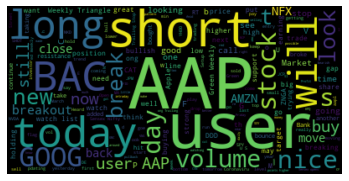

In [145]:
from wordcloud import WordCloud
# your code here

cloud = data['Text']

wordcloud = WordCloud().generate(text_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Are there stop words that have not been removed by spaCy? Remove them.

Create a function that given the name of a stock return the number of tweets with a positive sentiment and the number of tweets with negative sentiment.

In [ ]:
# your code here

What are the most common words in the positive tweets? Check it after removing punctuation, stopwords etc. 

In [ ]:
# your code here

What are the most common words in the negative tweets? Check it after removing punctuation, stopwords etc. 